In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
import itertools
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing

In [52]:
df = pd.read_csv('BreastCancer - KNN.csv')
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [31]:
df['class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

In [32]:
df.columns

Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

In [33]:
X=df[['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']].values
X[0:5]

array([[ 63.0278175 ,  22.55258597,  39.60911701,  40.47523153,
         98.67291675,  -0.25439999],
       [ 39.05695098,  10.06099147,  25.01537822,  28.99595951,
        114.4054254 ,   4.56425864],
       [ 68.83202098,  22.21848205,  50.09219357,  46.61353893,
        105.9851355 ,  -3.53031731],
       [ 69.29700807,  24.65287791,  44.31123813,  44.64413017,
        101.8684951 ,  11.21152344],
       [ 49.71285934,   9.65207488,  28.317406  ,  40.06078446,
        108.1687249 ,   7.91850062]])

In [34]:
y=df['class'].values
y[0:5]

array(['Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal'],
      dtype=object)

In [35]:
X=preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.14708636,  0.50136873, -0.6651769 , -0.18495031, -1.4476468 ,
        -0.70805942],
       [-1.24586434, -0.74876898, -1.45300075, -1.0415207 , -0.26438488,
        -0.57955637],
       [ 0.4843695 ,  0.46793218, -0.09926175,  0.2730833 , -0.89768556,
        -0.79542095],
       [ 0.51138997,  0.71156241, -0.41133905,  0.12612823, -1.2073033 ,
        -0.40228841],
       [-0.62664788, -0.78969266, -1.27474511, -0.21587588, -0.73345503,
        -0.4901061 ]])

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=4)
print("Train set:", X_train.shape, y_train.shape)
print("Test set:",X_test.shape,y_test.shape)

Train set: (248, 6) (248,)
Test set: (62, 6) (62,)


In [37]:
from sklearn.neighbors import KNeighborsClassifier

k=5
neigh=KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
neigh

KNeighborsClassifier()

In [38]:
y_hat=neigh.predict(X_test)
y_hat[0:5]

array(['Abnormal', 'Normal', 'Abnormal', 'Normal', 'Normal'], dtype=object)

In [39]:
from sklearn import metrics
print("Eğitim verisi doğruluğu:", metrics.accuracy_score(y_train,neigh.predict(X_train)))
print("Test verisi doğruluğu:", metrics.accuracy_score(y_test,y_hat))

Eğitim verisi doğruluğu: 0.8870967741935484
Test verisi doğruluğu: 0.8064516129032258


In [40]:
Ks = 10

mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.75806452, 0.77419355, 0.75806452, 0.77419355, 0.80645161,
       0.82258065, 0.80645161, 0.82258065, 0.83870968])

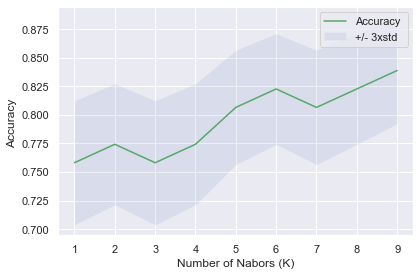

In [41]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [42]:
print( "En yüksek Doğruluk=", mean_acc.max(), "K=", mean_acc.argmax()+1,"olduğunda gerçekleşti.")

En yüksek Doğruluk= 0.8387096774193549 K= 9 olduğunda gerçekleşti.
